# Amplitude spectrum

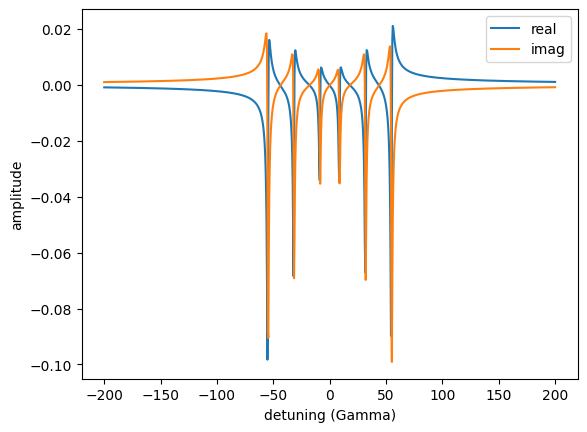

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

iron = nx.Material.Template(nx.lib.material.Fe)

layer_Fe = nx.Layer(id = "Fe layer",
                    material = iron,
                    thickness = 3000)

site = nx.Hyperfine(magnetic_field = 33,
                       isotropic = True)

iron.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                       objects = [sample],
                       isotope = nx.lib.moessbauer.Fe57)

detuning = np.linspace(-200, 200, 1001)

amp_spectrum = nx.AmplitudeSpectrum(experiment = exp,
                                    detuning = detuning,
                                    electronic = False,
                                    id = "my anplitude spectrum")

amp = amp_spectrum.Calculate()

amp_sigma = amp[:,0]
amp_pi = amp[:,1]

plt.plot(detuning, np.real(amp_sigma), label = 'real')
plt.plot(detuning, np.imag(amp_sigma), label = 'imag')
plt.legend()
plt.xlabel('detuning (Gamma)')
plt.ylabel('amplitude')
plt.show()

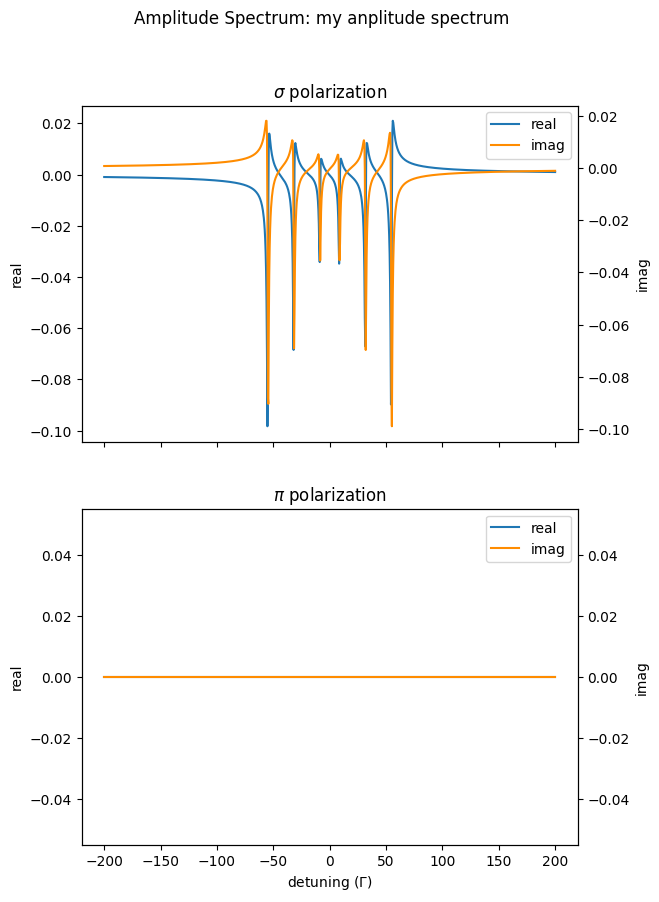

In [2]:
amp_spectrum.Plot()

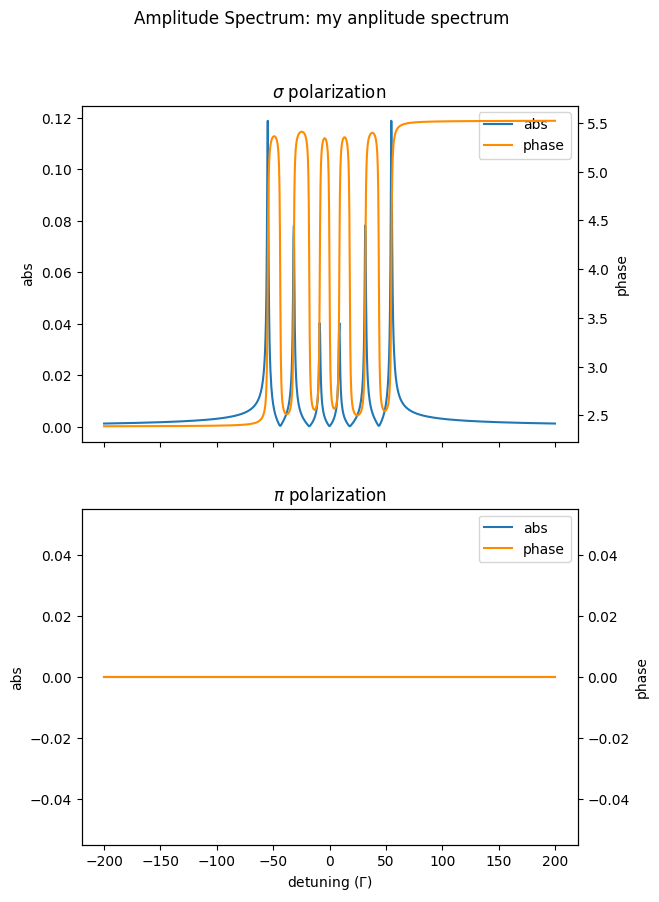

In [3]:
amp_spectrum.Plot(polar = True, unwrap = True)